In [1]:
# Artificial Neural Network
# Importing the libraries
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
# Part 1 - Data Preprocessing
# Importing the dataset
dataset = pd.read_csv("C:/Users/hp/Desktop/hip/again/all_combined.csv")

X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values
print(X)
print(np.isnan(X).any())
print(y)
print(np.isnan(y).any())

[[ 2.89044828e+04  2.20679000e-04  6.92078830e-02]
 [ 2.53049152e+04  1.38559000e-04  7.32996730e-02]
 [ 2.67337872e+04  1.00102000e-04  7.27204820e-02]
 ...
 [ 1.95000000e+04 -2.20000000e-06  2.26506000e-03]
 [ 1.93000000e+04 -2.21000000e-06  2.53012000e-03]
 [ 4.85000000e+04 -2.21000000e-06  2.24096400e-03]]
False
[0 0 0 ... 2 2 2]
False


In [3]:
# Encoding categorical data

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print(y)

[0 0 0 ... 2 2 2]


In [23]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
np.save('C:/Users/4nm20/Desktop/host_git/X_train.npy',X_train)


In [24]:
print(X_train, y_train)

[[ 1.93637348e+08 -3.23000000e-08  4.71655370e-02]
 [ 2.20431000e+04  5.33000000e-07  1.13753735e-01]
 [ 2.44212121e+04 -6.31000000e-07  5.81014970e-02]
 ...
 [ 3.56307784e+04  1.44000000e-06  8.58930810e-02]
 [ 2.15558823e+04 -6.18000000e-07  5.51591070e-02]
 [ 2.42184848e+05 -1.47000000e-07  5.66520630e-02]] [2 0 1 ... 0 1 2]


In [25]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)

[[ 4.17692476  0.01727475 -0.68048544]
 [-0.32477334  0.23660595  1.24169398]
 [-0.32471804 -0.21501534 -0.36480071]
 ...
 [-0.32445741  0.58851361  0.43744972]
 [-0.32478466 -0.20997146 -0.4497377 ]
 [-0.31965488 -0.02722779 -0.40664104]]


In [26]:
# Part 2 - Building the ANN
from keras import regularizers
input_dim = 3
# Initializing the ANN
ann = tf.keras.models.Sequential()
# Adding the input layer and the first hidden layer
ann.add(tf.keras.layers.Dense(units=64, activation='relu', input_dim=input_dim, kernel_regularizer=regularizers.l2(0.01)))
ann.add(tf.keras.layers.Dropout(0.5))
# Adding the second hidden layer
ann.add(tf.keras.layers.Dense(units=6))
ann.add(tf.keras.layers.Dropout(0.5))
# Adding the second hidden layer
ann.add(tf.keras.layers.Dense(units=6))

ann.add(tf.keras.layers.Dropout(0.5))
ann.add(tf.keras.layers.Dense(units=3, activation='softmax'))

In [78]:
# from keras import regularizers

# input_dim = 3

# # Initializing the ANN
# ann = tf.keras.models.Sequential()

# # Adding the input layer and the first hidden layer
# ann.add(tf.keras.layers.Dense(units=128, activation='relu', input_dim=input_dim, kernel_regularizer=regularizers.l2(0.01)))
# ann.add(tf.keras.layers.Dropout(0.5))

# # Adding more hidden layers
# ann.add(tf.keras.layers.Dense(units=64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
# ann.add(tf.keras.layers.Dropout(0.5))

# ann.add(tf.keras.layers.Dense(units=32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
# ann.add(tf.keras.layers.Dropout(0.5))

# # Adding the output layer
# ann.add(tf.keras.layers.Dense(units=3, activation='softmax'))

# # Compiling the ANN
# ann.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [27]:
from keras.utils import to_categorical

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)
print(y_train)
print(y_train_encoded)
print(y_test_encoded)

[2 0 1 ... 0 1 2]
[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 ...
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [28]:
ann.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [81]:
# from keras.callbacks import EarlyStopping

# early_stopping = EarlyStopping(monitor='val_loss', patience=5)
# ann.fit(X_train, y_train_encoded, validation_data=(X_test, y_test_encoded), epochs=100, callbacks=[early_stopping])


In [29]:
history=ann.fit(X_train, y_train_encoded, batch_size = 32, epochs = 100, validation_data=(X_test, y_test_encoded))

Epoch 1/100
640/640 [==============================] - 2s 2ms/step - loss: 0.7729 - accuracy: 0.6668 - val_loss: 0.3402 - val_accuracy: 0.9742
Epoch 2/100
640/640 [==============================] - 1s 1ms/step - loss: 0.4973 - accuracy: 0.8289 - val_loss: 0.1853 - val_accuracy: 0.9969
Epoch 3/100
640/640 [==============================] - 1s 1ms/step - loss: 0.4165 - accuracy: 0.8597 - val_loss: 0.1347 - val_accuracy: 0.9969
Epoch 4/100
640/640 [==============================] - 1s 1ms/step - loss: 0.3597 - accuracy: 0.8838 - val_loss: 0.1136 - val_accuracy: 0.9969
Epoch 5/100
640/640 [==============================] - 1s 1ms/step - loss: 0.3264 - accuracy: 0.8988 - val_loss: 0.1088 - val_accuracy: 0.9969
Epoch 6/100
640/640 [==============================] - 1s 2ms/step - loss: 0.3024 - accuracy: 0.9085 - val_loss: 0.0901 - val_accuracy: 0.9971
Epoch 7/100
640/640 [==============================] - 1s 1ms/step - loss: 0.2879 - accuracy: 0.9181 - val_loss: 0.0741 - val_accuracy: 0.9971

In [30]:
_,train_accuracy = ann.evaluate(X_train, y_train_encoded)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

640/640 [==============================] - 1s 766us/step - loss: 0.0281 - accuracy: 0.9977
Training Accuracy: 99.77%


In [31]:
loss, accuracy = ann.evaluate(X_test, y_test_encoded)
print(f'Testing Accuracy: {accuracy* 100:.2f}%')

160/160 [==============================] - 0s 876us/step - loss: 0.0308 - accuracy: 0.9971
Testing Accuracy: 99.71%


In [32]:
# Predicting the Test set results
y_pred = ann.predict(X_test)

print(y_pred)

y_pred_class = y_pred.argmax(axis=1)
print()
print(y_pred_class)

160/160 [==============================] - 0s 779us/step
[[1.21561961e-05 1.29840973e-11 9.99987841e-01]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00]
 ...
 [1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.23347045e-05 1.50839220e-11 9.99987721e-01]
 [3.84455452e-05 3.58042818e-10 9.99961495e-01]]

[2 0 0 ... 0 2 2]


[[1641    0    0]
 [   0 1720    0]
 [   0   15 1739]]


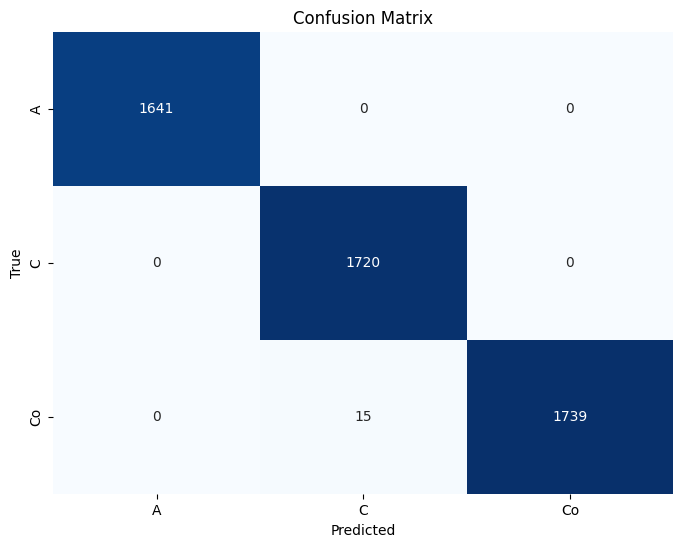

In [33]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_class)
print(conf_matrix)


# Plot the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
classes = ['A','C','Co']
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


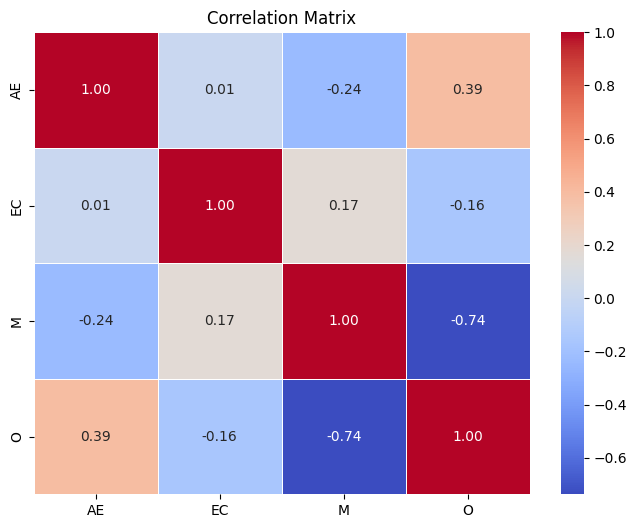

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

df = dataset.iloc[:,1:]
# Assuming df is your DataFrame with the data
# If you have a correlation matrix directly, you can skip the next line
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Plot the correlation matrix using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Show the plot
plt.title('Correlation Matrix')
plt.show()


In [35]:
test = ann.predict(sc.transform([[30900
,0.000186583
,0.077192771]]))
print(test.argmax(axis=1))

1/1 [==============================] - 0s 25ms/step
[0]


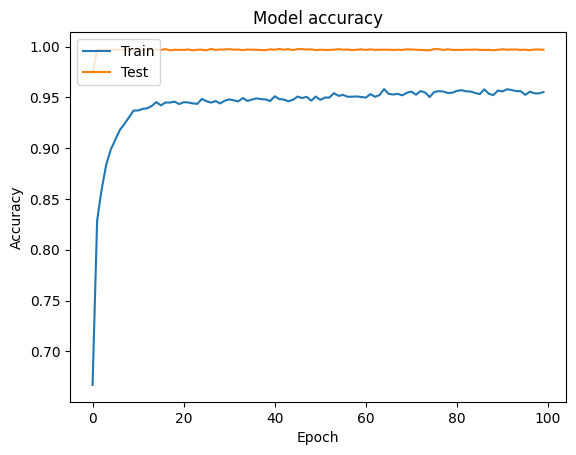

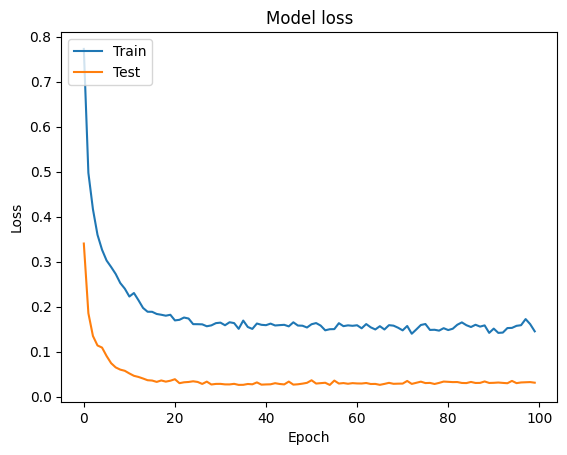

In [37]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

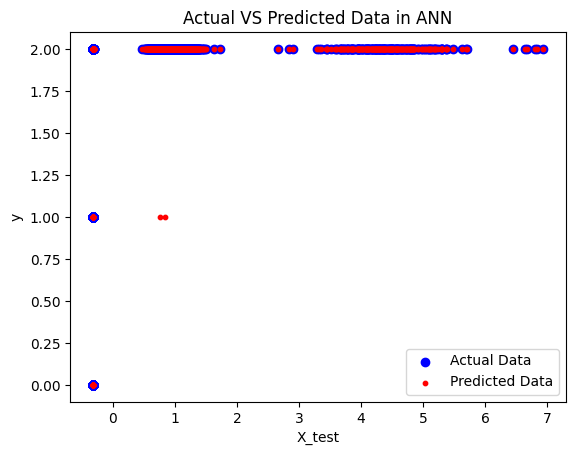

In [38]:
plt.scatter(X_test[:, 0], y_test, color='blue', label='Actual Data')
plt.scatter(X_test[:, 0], y_pred_class, color='red', label='Predicted Data',s=10)
plt.title('Actual VS Predicted Data in ANN')
plt.xlabel('X_test')
plt.ylabel('y')
plt.legend()
plt.show()

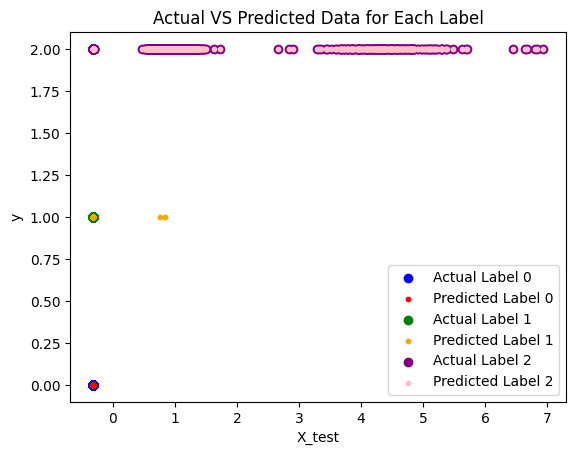

In [39]:
import matplotlib.pyplot as plt

# Assuming y_test and y_pred_class contain the actual and predicted labels, respectively

# Plot for Label 0
plt.scatter(X_test[y_test == 0, 0], y_test[y_test == 0], color='blue', label='Actual Label 0')
plt.scatter(X_test[y_pred_class == 0, 0], y_pred_class[y_pred_class == 0], color='red', label='Predicted Label 0', s=10)

# Plot for Label 1
plt.scatter(X_test[y_test == 1, 0], y_test[y_test == 1], color='green', label='Actual Label 1')
plt.scatter(X_test[y_pred_class == 1, 0], y_pred_class[y_pred_class == 1], color='orange', label='Predicted Label 1', s=10)

# Plot for Label 2
plt.scatter(X_test[y_test == 2, 0], y_test[y_test == 2], color='purple', label='Actual Label 2')
plt.scatter(X_test[y_pred_class == 2, 0], y_pred_class[y_pred_class == 2], color='pink', label='Predicted Label 2', s=10)

plt.title('Actual VS Predicted Data for Each Label')
plt.xlabel('X_test')
plt.ylabel('y')
plt.legend()
plt.show()


In [40]:
import pickle

filename = 'trained_model.sav'
pickle.dump(ann,open(filename,'wb'))

In [115]:
ann.save('front.h5')